      x    t     u (K)  ux (K/m)  ut (K/s)  d(d(u;x);x) (K/m^2)
0  0.00  0.0  0.000000  6.291412  0.000000            -2.478040
1  0.02  0.0  0.125333  6.241803 -0.098927            -4.936541
2  0.04  0.0  0.248689  6.093756 -0.196294            -9.795229
3  0.06  0.0  0.368123  5.849607 -0.290565           -14.499441
4  0.08  0.0  0.481751  5.513207 -0.380254           -18.974988
5  0.10  0.0  0.587782  5.089860 -0.463946           -23.151288
6  0.12  0.0  0.684544  4.586242 -0.540322           -26.962478
7  0.14  0.0  0.770510  4.010297 -0.608176           -30.348454


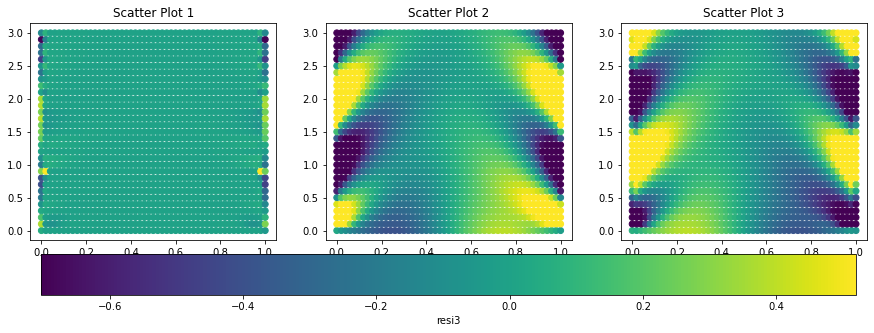

(array([  9.,  53.,  94., 450., 767., 128.,  52.,  21.,   3.,   4.]),
 array([-1.53120357, -1.16548145, -0.79975933, -0.43403722, -0.0683151 ,
         0.29740702,  0.66312913,  1.02885125,  1.39457337,  1.76029548,
         2.1260176 ]),
 <BarContainer object of 10 artists>)

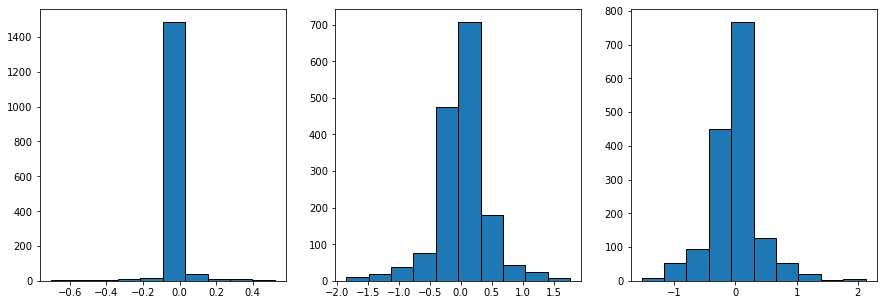

In [1]:
import sys
sys.path.append('../../')
from user_fun.io import read_comsol
from user_fun.io.read_comsol import process_comsol_time_table
import matplotlib.pyplot as plt
import matplotlib.tri as tri

tb = read_comsol.comsol_read('time_heat.csv',skiprows = 8)
tb = process_comsol_time_table(tb, space_dimension=1)
print(tb.head(8))

resi = tb['ut (K/s)'].to_numpy() - 0.02* tb['d(d(u;x);x) (K/m^2)'].to_numpy()
resi2 = tb['ut (K/s)'].to_numpy() - 0.01* tb['d(d(u;x);x) (K/m^2)'].to_numpy()
resi3 = tb['ut (K/s)'].to_numpy() - 0.03* tb['d(d(u;x);x) (K/m^2)'].to_numpy()

x = tb['x'].to_numpy()
t = tb['t'].to_numpy()
import numpy as np

# 创建 color normalization
vmin = np.min(resi)
vmax = np.max(resi)
from matplotlib.colors import Normalize
norm = Normalize(vmin=vmin, vmax=vmax)

# 创建绘图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制散点图 1
sc1 = axs[0].scatter(x, t, c=resi, cmap='viridis', norm=norm)
axs[0].set_title('Scatter Plot 1')

# 绘制散点图 2
sc2 = axs[1].scatter(x, t, c=resi2, cmap='viridis', norm=norm)
axs[1].set_title('Scatter Plot 2')

# 绘制散点图 3
sc3 = axs[2].scatter(x, t, c=resi3, cmap='viridis', norm=norm)
axs[2].set_title('Scatter Plot 3')

# 添加 colorbar
cbar = fig.colorbar(sc1, ax=axs, orientation='horizontal', pad=0.05)
cbar.set_label('resi3')

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(resi, bins=10, edgecolor='black')
axs[1].hist(resi2, bins=10, edgecolor='black')
axs[2].hist(resi3, bins=10, edgecolor='black')

tb2 = process_comsol_time_table(tb)
tb2